# Teste das rotinas de plotagem 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from math import degrees, radians, sin, cos
from normaslt.draw import find_line_start, plot_dimension, plot_feixe, plot_cadeia, plot_distance_radius, plot_line_pt

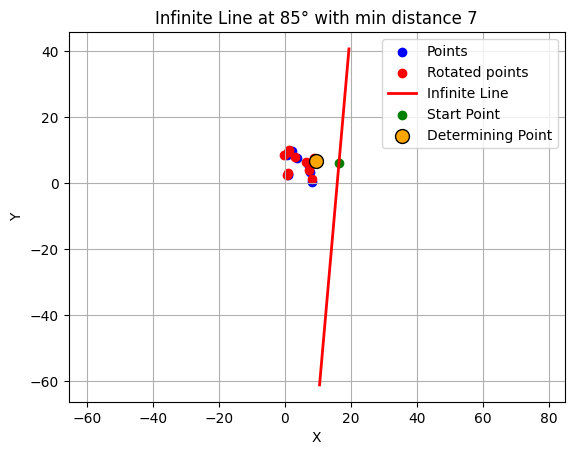

In [18]:


def draw_infinite_line(points, angle, min_distance):
    start, rot_pts, determining_point = find_line_start(points, angle, min_distance)
    
    # Compute line equation
    theta = np.radians(angle)
    slope = np.tan(theta)
    
    # Define x-range for plotting
    x_vals = np.linspace(min(points[:, 0]) + 10, max(points[:, 0]) + 10, 400)
    y_vals = start[1] + slope * (x_vals - start[0])
    
    # Plot
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')
    plt.scatter(rot_pts[:, 0], rot_pts[:, 1], color='red', label='Rotated points')
    plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Infinite Line')
    plt.scatter([start[0]], [start[1]], color='green', label='Start Point')
    plt.scatter([determining_point[0]], [determining_point[1]], color='orange', label='Determining Point', edgecolors='black', s=100)
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Infinite Line at {angle}° with min distance {min_distance}')
    plt.grid()
    plt.axis('equal')  # Ensure equal proportions for x and y axes
    plt.show()

# Example usage
points = np.random.rand(10, 2) * 10  # Generate random points in a 10x10 area
draw_infinite_line(points, angle=85, min_distance=7)


## Testes de plotagem

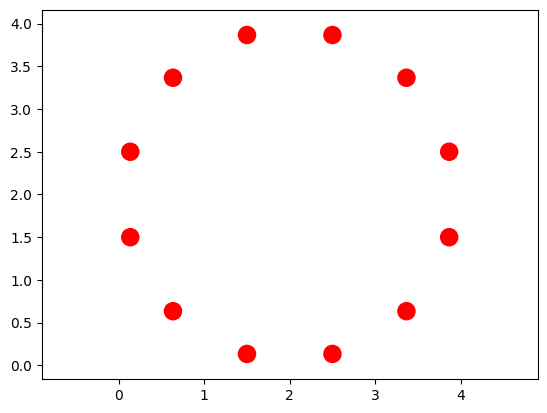

In [19]:
plt.figure()
plot_feixe(plt, (2,2), nc=12, ang=45, esp=1)
plt.axis('equal')
plt.show()

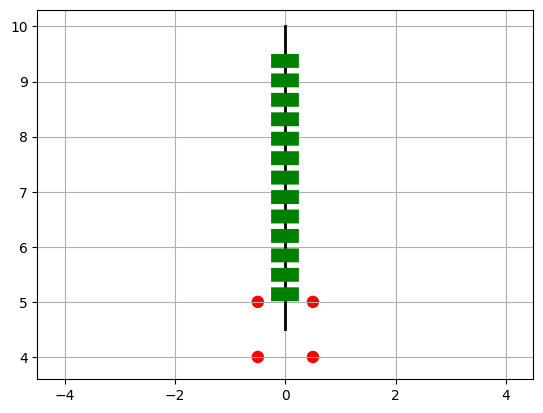

[[0.5000000000000001, 5.0], [-0.5, 5.0], [-0.5000000000000001, 4.0], [0.4999999999999999, 4.0]]


In [20]:
plt.figure()
pts = plot_cadeia(plt, (0,10), l=5, nc=4, angsc=45, esp=1)
plt.axis('equal')
plt.grid(visible=True, which='major', axis='both')
plt.show()
print(pts)

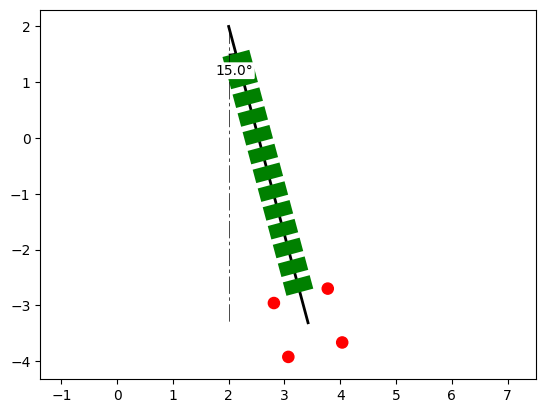

[[3.777058138657138, -2.7002196088940806], [2.8111323123680694, -2.9590386539966014], [3.06995135747059, -3.92496448028567], [4.035877183759658, -3.6661454351831493]]


In [21]:
plt.figure()
pts = plot_cadeia(plt, (2,2), l=5, ang=15, nc=4, angsc=45, esp=1)
plt.axis('equal')
plt.show()
print(pts)

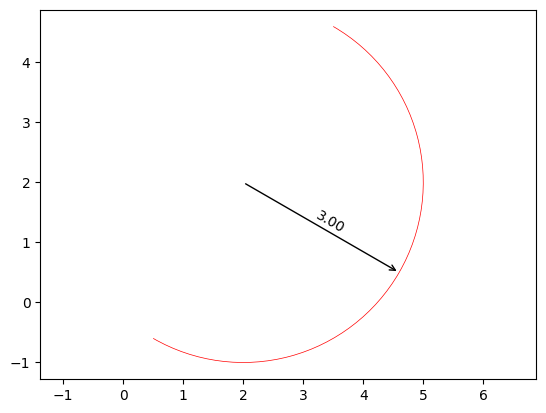

In [22]:
plt.figure()
plot_distance_radius(plt, (2,2), radius=3, angle=-30)
plt.axis('equal')
plt.show()

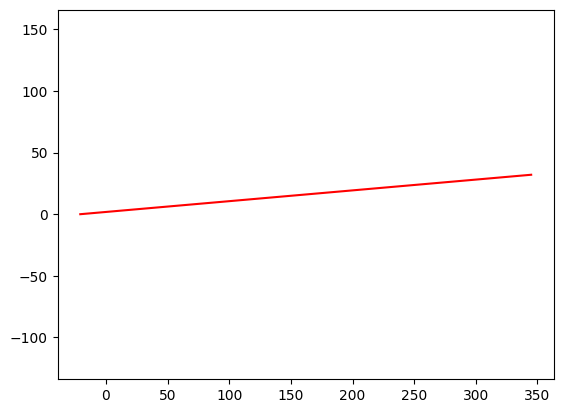

In [23]:
plt.figure()
plot_line_pt(plt, (2,2), 5, 0, 32)
plt.axis('equal')
plt.show()

## Balanço assincrono
Reprodução da Fig. 5.3 (p. 98) da Cigre TB 348

[TODO] chamar rotina de cálculo 

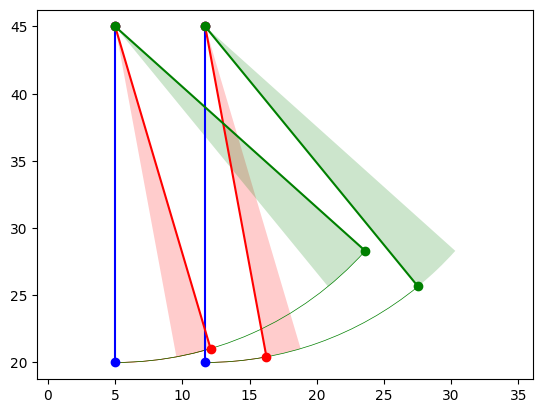

In [24]:
x1 = 5. # Posição horizontal da primeira fase na torre
x2 = x1 + 6.7 # Posição horizontal da segunda fase na torre
lc = 5. # Comprimento da cadeia (m)
f = 20. # Flecha (m)
h = 20. # clearance (m)
eb = 0.4 # Espaçamento do bundle (m)
dc = 32.85e-3 # Diâmetro do subcondutor (m) (ACSR Finch)
mc = 2.11 # Massa linear do subcondutor (kg/m)
mi = 300 # Massa da cadeia de isoladores (kg)
ai = 1.5 # Área de exposição da cadeia (m²)
Vv = 400 # Vão de vento (m)
Vp = 400 # Vão de peso (m)
Vp = 20. # Vento de projeto, 10 min, 10 m (m/s)
sigmavv = 0.14 # Coeficiente de variação

# Ventos de referência
# 20 m, 5 min
V205 = Vp * (20 / 10)**0.16 * 1.05
# 20 m, 10 min
V2010 = Vp * (20 / 10)**0.16

ang1a=radians(16.5)
ang1b=radians(10.5)
ang2a=radians(48.1)
ang2b=radians(39.3)
l = f + lc
plt.figure()
plt.plot([x1, x1], [h+l, h],'bo-')
plt.plot([x2, x2], [h+l, h],'bo-')

plt.plot([x1, x1+l*sin(ang1a)], [h+l, h+l*(1-cos(ang1a))],'ro-')
plt.plot([x2, x2+l*sin(ang1b)], [h+l, h+l*(1-cos(ang1b))],'ro-')
plt.gca().add_patch(patches.Arc((x1, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang1a)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Wedge((x1, h+l), l, degrees(ang1b)-90., degrees(ang1a)-90.,lw=0.5,facecolor='r', alpha=0.2))
plt.gca().add_patch(patches.Arc((x2, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang1b)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Wedge((x2, h+l), l, degrees(ang1b)-90., degrees(ang1a)-90.,lw=0.5,facecolor='r', alpha=0.2))
plt.plot([x1, x1+l*sin(ang2a)], [h+l, h+l*(1-cos(ang2a))],'go-')
plt.plot([x2, x2+l*sin(ang2b)], [h+l, h+l*(1-cos(ang2b))],'go-')
plt.gca().add_patch(patches.Arc((x1, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang2a)-90.,lw=0.5,color='g'))
plt.gca().add_patch(patches.Wedge((x1, h+l), l, degrees(ang2b)-90., degrees(ang2a)-90.,lw=0.5,facecolor='g', alpha=0.2))
plt.gca().add_patch(patches.Arc((x2, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang2b)-90.,lw=0.5,color='g'))
plt.gca().add_patch(patches.Wedge((x2, h+l), l, degrees(ang2b)-90., degrees(ang2a)-90.,lw=0.5,facecolor='g', alpha=0.2))
plt.axis('equal')
plt.show()